### Funções gerais - São utilizadas em mais de uma seção 

Importando as bibliotecas que serão utilizadas ao longo das células

In [65]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import networkx as nx
import scipy 
import random

Funções a serem utilizadas ao longo das celulas

In [66]:
def plot_grafo(G, titulo="Grafo"):
    '''
    Plota um grafo com rótulos de nós e pesos de arestas (se possuir).

    Esta função cria uma visualização de um grafo, exibindo os nós e arestas 
    com os pesos das arestas, se presentes. A disposição dos nós é feita com o layout "spring" 
    do NetworkX.

    Parâmetros:
    -----------
    G : networkx.DiGraph
        O grafo direcionado a ser plotado.
    
    titulo : str, opcional (default="Grafo")
        O título do gráfico exibido.

    Retorno:
    --------
    None
        A função apenas exibe o gráfico do grafo e não retorna nenhum valor.
    '''

    pos = nx.spring_layout(G)

    nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', edgecolors='black', arrows=True)

    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    plt.title(titulo)
    plt.show()

def gerador_de_grafo(n=10, k=4, p=0.5, seed=42):
    '''
    Gera um grafo não direcionado usando o modelo Watts-Strogatz.

    Esta função cria um grafo pequeno-mundo baseado no modelo Watts-Strogatz, 
    onde os nós são conectados em uma rede com alto grau de agrupamento e um caminho médio pequeno.

    Parâmetros:
    -----------
    n : int, opcional (default=10)
        O número de nós no grafo.
    
    k : int, opcional (default=4)
        O número de vizinhos conectados inicialmente a cada nó. Deve ser menor que `n`.
    
    p : float, opcional (default=0.5)
        A probabilidade de reconectar uma aresta, introduzindo atalhos na rede.
    
    seed : int, opcional (default=42)
        A semente para o gerador de números aleatórios, garantindo reprodutibilidade nos resultados.

    Retorno:
    --------
    Graph : networkx.Graph
        Um grafo não direcionado gerado pelo algoritmo Watts-Strogatz.
    '''

    return nx.connected_watts_strogatz_graph(n=n,k=k,p=p,seed=seed)

def adicionar_pesos_ao_grafo(G, custo_min_aresta=1, custo_max_aresta=5):
    '''
    Adiciona pesos aleatórios às arestas de um grafo.

    Esta função transforma um grafo não direcionado em um grafo direcionado, 
    atribuindo pesos aleatórios a cada aresta, que são gerados dentro de um intervalo 
    especificado.

    Parâmetros:
    -----------
    G : networkx.Graph
        O grafo não direcionado ao qual os pesos serão adicionados.
    
    custo_min_aresta : int, opcional (default=1)
        O valor mínimo do peso de uma aresta.
    
    custo_max_aresta : int, opcional (default=5)
        O valor máximo do peso de uma aresta.

    Retorno:
    --------
    DiGraph : networkx.DiGraph
        Um grafo direcionado onde as arestas possuem pesos aleatórios 
        dentro do intervalo especificado.
    '''
    G_dir = nx.DiGraph()

    for u, v in G.edges():
        peso = random.randint(custo_min_aresta, custo_max_aresta)
        G_dir.add_edge(u, v, weight=peso)
        G_dir.add_edge(v, u, weight=peso)  

    return G_dir

### 1. Gerando grafos simples e conexos com n=10, n=50 e n=100 (n corresponde ao numero de vétices) 

Gerando cada grafo para n=10, n=50 e n=100

In [67]:
GRAFOS_GERADOS = [
    gerador_de_grafo(n=10), 
    gerador_de_grafo(n=50), 
    gerador_de_grafo(n=100)
]

Exibindo cada grafo gerado

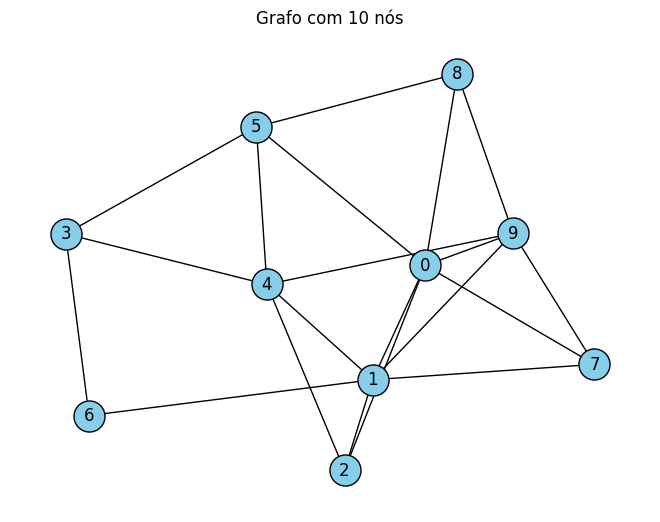

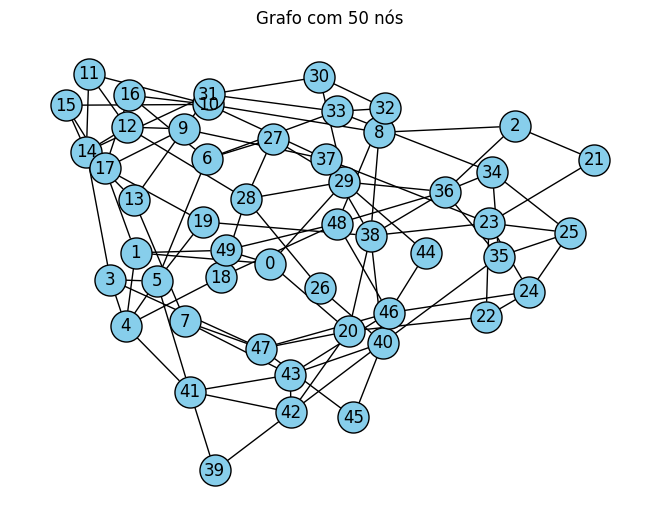

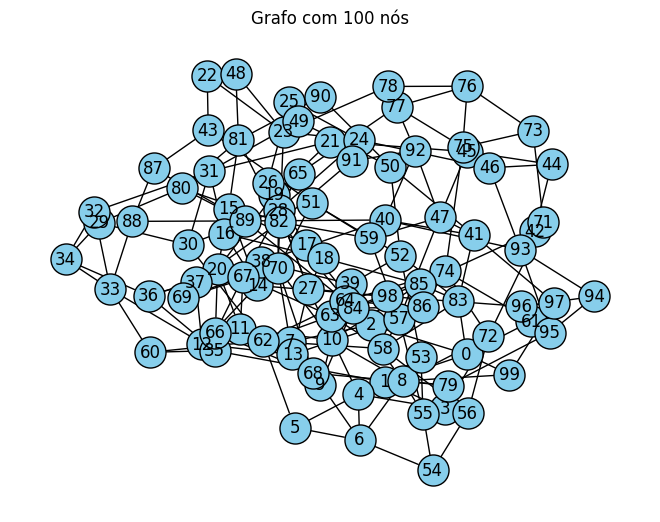

In [68]:
for GRAFO in GRAFOS_GERADOS:
    plot_grafo(GRAFO, f'Grafo com {len(GRAFO.nodes)} nós')

### 2. Gerando a matriz de adjacencia dos grafos 

Obtendo a matriz adjacente de cada grafo

In [69]:
adj_matrixes = [nx.adjacency_matrix(GRAFO) for GRAFO in GRAFOS_GERADOS]

Exibindo elas 

In [70]:
for adj_matrix in adj_matrixes:
    print(f"Exibindo a matriz de adjacencia para n={adj_matrix.shape[0]}")
    display(pd.DataFrame(adj_matrix))

Exibindo a matriz de adjacencia para n=10


,0
0,"(0, 1)\t1\n (0, 2)\t1\n (0, 5)\t1\n (0, 7..."
1,"(0, 0)\t1\n (0, 2)\t1\n (0, 4)\t1\n (0, 6..."
2,"(0, 0)\t1\n (0, 1)\t1\n (0, 4)\t1"
3,"(0, 4)\t1\n (0, 5)\t1\n (0, 6)\t1"
4,"(0, 1)\t1\n (0, 2)\t1\n (0, 3)\t1\n (0, 5..."
5,"(0, 0)\t1\n (0, 3)\t1\n (0, 4)\t1\n (0, 8..."
6,"(0, 1)\t1\n (0, 3)\t1"
7,"(0, 0)\t1\n (0, 1)\t1\n (0, 9)\t1"
8,"(0, 0)\t1\n (0, 5)\t1\n (0, 9)\t1"
9,"(0, 0)\t1\n (0, 1)\t1\n (0, 4)\t1\n (0, 7..."


Exibindo a matriz de adjacencia para n=50


,0
0,"(0, 1)\t1\n (0, 20)\t1\n (0, 29)\t1\n (0,..."
1,"(0, 0)\t1\n (0, 4)\t1\n (0, 17)\t1\n (0, ..."
2,"(0, 8)\t1\n (0, 21)\t1\n (0, 36)\t1"
3,"(0, 4)\t1\n (0, 5)\t1\n (0, 14)\t1\n (0, ..."
4,"(0, 1)\t1\n (0, 3)\t1\n (0, 5)\t1\n (0, 1..."
5,"(0, 3)\t1\n (0, 4)\t1\n (0, 6)\t1\n (0, 1..."
6,"(0, 5)\t1\n (0, 16)\t1\n (0, 27)\t1\n (0,..."
7,"(0, 13)\t1\n (0, 43)\t1\n (0, 47)\t1"
8,"(0, 2)\t1\n (0, 10)\t1\n (0, 38)\t1"
9,"(0, 12)\t1\n (0, 17)\t1\n (0, 37)\t1"


Exibindo a matriz de adjacencia para n=100


,0
0,"(0, 1)\t1\n (0, 2)\t1\n (0, 61)\t1\n (0, ..."
1,"(0, 0)\t1\n (0, 3)\t1\n (0, 35)\t1\n (0, ..."
2,"(0, 0)\t1\n (0, 7)\t1\n (0, 17)\t1"
3,"(0, 1)\t1\n (0, 4)\t1\n (0, 72)\t1"
4,"(0, 3)\t1\n (0, 5)\t1\n (0, 6)\t1\n (0, 2..."
...,...
95,"(0, 61)\t1\n (0, 79)\t1\n (0, 93)\t1\n (0..."
96,"(0, 94)\t1\n (0, 95)\t1\n (0, 97)\t1\n (0..."
97,"(0, 41)\t1\n (0, 96)\t1\n (0, 99)\t1"
98,"(0, 14)\t1\n (0, 27)\t1\n (0, 96)\t1"


### 3. Gerar aleatoriamente a matriz de custo, com entradas de números inteiros, das arestas pertencentes a [1,5]

Agora iremos adicionar custos de 1 a 5 as arestas do grafo

In [71]:
grafos_com_pesos = [adicionar_pesos_ao_grafo(GRAFO,custo_min_aresta=1,custo_max_aresta=5) for GRAFO in GRAFOS_GERADOS]

Construindo as matrizes de custos

In [72]:
def gerar_matriz_de_custo(G):
    # Obter o número de nós no grafo
    n = G.number_of_nodes()
    
    # Inicializar uma matriz n x n com valores infinitos (sem ligação entre os nós)
    matriz_custo = np.full((n, n), np.inf)
    
    # Preencher a matriz com os pesos das arestas
    for (u, v, dados) in G.edges(data=True):
        matriz_custo[u, v] = dados.get('weight', 1)  # Se não houver peso, usar o padrão 1
    
    return matriz_custo

matrizes_de_custos = [gerar_matriz_de_custo(grafo_com_peso) for grafo_com_peso in grafos_com_pesos]

Exibindo as matrizes:

In [73]:
for matriz_de_custo in matrizes_de_custos:
    print(f"Exibindo a matriz de custo para n={matriz_de_custo.shape[0]}")
    display(pd.DataFrame(matriz_de_custo))

Exibindo a matriz de custo para n=10


,0,1,2,3,4,5,6,7,8,9
0,inf,2.0,5.0,inf,inf,5.0,inf,3.0,4.0,5.0
1,2.0,inf,5.0,inf,5.0,inf,2.0,4.0,inf,5.0
2,5.0,5.0,inf,inf,5.0,inf,inf,inf,inf,inf
3,inf,inf,inf,inf,4.0,1.0,4.0,inf,inf,inf
4,inf,5.0,5.0,4.0,inf,1.0,inf,inf,inf,1.0
5,5.0,inf,inf,1.0,1.0,inf,inf,inf,1.0,inf
6,inf,2.0,inf,4.0,inf,inf,inf,inf,inf,inf
7,3.0,4.0,inf,inf,inf,inf,inf,inf,inf,2.0
8,4.0,inf,inf,inf,inf,1.0,inf,inf,inf,2.0
9,5.0,5.0,inf,inf,1.0,inf,inf,2.0,2.0,inf


Exibindo a matriz de custo para n=50


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,inf,5.0,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,3.0
1,5.0,inf,inf,inf,2.0,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,5.0
2,inf,inf,inf,inf,inf,inf,inf,inf,2.0,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
3,inf,inf,inf,inf,3.0,3.0,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,3.0,inf,inf
4,inf,2.0,inf,3.0,inf,1.0,inf,inf,inf,inf,...,inf,5.0,inf,inf,inf,inf,inf,inf,inf,inf
5,inf,inf,inf,3.0,1.0,inf,4.0,inf,inf,inf,...,inf,4.0,inf,inf,inf,inf,inf,inf,inf,inf
6,inf,inf,inf,inf,inf,4.0,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
7,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,4.0,inf,inf,inf,4.0,inf,inf
8,inf,inf,2.0,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
9,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


Exibindo a matriz de custo para n=100


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,inf,3.0,4.0,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,5.0
1,3.0,inf,inf,2.0,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,1.0
2,4.0,inf,inf,inf,inf,inf,inf,1.0,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
3,inf,2.0,inf,inf,5.0,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
4,inf,inf,inf,5.0,inf,2.0,3.0,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,3.0,1.0,inf,3.0,inf,inf,inf
96,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,2.0,3.0,inf,5.0,3.0,inf
97,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,5.0,inf,inf,3.0
98,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,...,inf,inf,inf,inf,inf,inf,3.0,inf,inf,inf


### 4. Implementar os algoritmos em grafos 

Por fim, vamos aplicar o método de Floyd-Warshall para encontrar os menores caminhos possiveis entre cada vertice

IMPLEMENTAÇÃO SEGUINDO O PSEUDOCÓDIGO:

```plaintext
função floyd_warshall(grafo):
    # Número de vértices no grafo
    n = comprimento(grafo)

    # Inicializa a matriz de distâncias
    dist = matriz(n, n, ∞)  # Cria uma matriz n x n preenchida com ∞

    # Define a distância de cada vértice para si mesmo como 0
    para cada vértice i de 0 a n-1:
        dist[i][i] = 0

    # Copia as arestas do grafo para a matriz de distâncias
    para cada vértice i de 0 a n-1:
        para cada vértice j de 0 a n-1:
            se grafo[i][j] ≠ 0:
                dist[i][j] = grafo[i][j]

    # Algoritmo de Floyd-Warshall
    para cada vértice k de 0 a n-1:
        para cada vértice i de 0 a n-1:
            para cada vértice j de 0 a n-1:
                # Atualiza a distância mínima
                dist[i][j] = mínimo(dist[i][j], dist[i][k] + dist[k][j])

    retornar dist


In [74]:
def floyd_warshall(G):
    '''
    Implementa o algoritmo de Floyd-Warshall para encontrar o menor caminho entre todos os pares de nós.

    Parâmetros:
    -----------
    G : networkx.DiGraph
        O grafo direcionado em que os pesos das arestas são considerados.

    Retorno:
    --------
    dist : list
        Matriz de distâncias, onde dist[i][j] é a menor distância do nó i para o nó j.
    '''
    
    # Obtém a matriz de adjacência como uma matriz densa (NumPy array)
    graph = nx.to_numpy_array(G)

    # Número de vértices no grafo
    n = len(graph)
    
    # Inicializa a matriz de distâncias
    dist = [[float('inf')] * n for _ in range(n)]
    
    # Define a distância de cada vértice para si mesmo como 0
    for i in range(n):
        dist[i][i] = 0

    # Copia as arestas do grafo para a matriz de distâncias
    for i in range(n):
        for j in range(n):
            if graph[i, j] != 0:  # Acessa elementos da matriz densa
                dist[i][j] = graph[i, j]

    # Algoritmo de Floyd-Warshall
    for k in range(n):
        for i in range(n):
            for j in range(n):
                # Atualiza a distância mínima
                dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])

    return dist

Definiremos tambem uma função que ira exibir o menor custo de um vértice para outro

In [75]:
def print_menor_custo_caminho(results, vertice_origem=None, vertice_destino=None):
    try: 
        if vertice_origem is None and  vertice_destino is None:
            vertice_origem = int(input('Digite o vértice de origem: '))
            vertice_destino = int(input('Digite o vértice de destino: '))
        print(f'O menor caminho do vertice {vertice_origem} para o vertice {vertice_destino} é de custo = {results[vertice_origem][vertice_destino]}')
    except:
        print('Não foi possível printar o menor caminho entre dois vertices, pois nao foram definidos os vertices')

### 5. Analisar a complexidade do algoritmo

### 6. Fazer interfaces mostrando:


### 7. Estudo a cerca do grafo do artigo selecionado

Construindo a matriz de adjacencia a partir do grafo do artigo

In [76]:
# Número de vértices no grafo (nós de 1 a 15)
num_vertices = 15

# Inicializando a matriz de adjacência com zeros (sem arestas inicialmente)
adj_matrix = np.zeros((num_vertices, num_vertices))

# Definindo as arestas conforme a imagem (baseado nos pesos fornecidos)
vertices = [
    (1,  2,  170), 
    (1,  3,  16), 
    (1,  4,  25),
    (2,  3,  50),
    (3,  4,  40), 
    (3,  6,  60),
    (4,  5,  40),
    (5,  6,  60), 
    (5,  11, 20),
    (6,  7,  60), 
    (6,  10, 80),
    (7,  8,  80),
    (8,  9,  70),
    (9,  10, 80), 
    (9,  13, 70),
    (10, 12, 120),
    (11, 12, 30),
    (12, 14, 120),
    (13, 15, 70), 
    (14, 15, 70)
]

# Preenchendo a matriz com os pesos das arestas
for vertice in vertices:
    u, v, peso = vertice
    adj_matrix[u-1, v-1] = peso  # Subtraímos 1 pois os índices de matriz começam em 0
    adj_matrix[v-1, u-1] = peso  # A matriz é simétrica para um grafo não direcionado

Transformando em pd.Dataframe e salvando a matriz de adjacencia em .csv

In [77]:
df = pd.DataFrame(adj_matrix)
df.to_csv('artigo_de_estudo/matriz_adjacente.csv')

display(df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,170.0,16.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,170.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16.0,50.0,0.0,40.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25.0,0.0,40.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,40.0,0.0,60.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0
5,0.0,0.0,60.0,0.0,60.0,0.0,60.0,0.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,60.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,80.0,0.0,0.0,70.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,80.0,0.0,0.0,80.0,0.0,0.0,120.0,0.0,0.0,0.0


O tipo de dados que iremos trabalhar no NetworkX é o `DiGraph`.

In [78]:
G = nx.DiGraph(df)

Para realizar a plotagem do grafo usaremos a função `plot_grafo()`

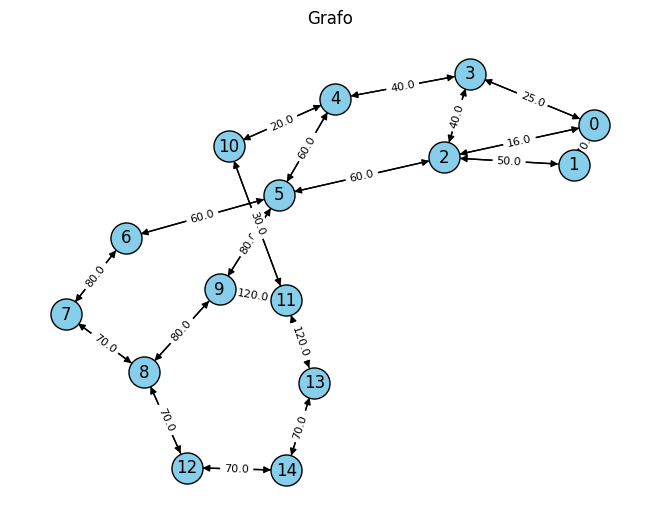

In [79]:
plot_grafo(G)

Aplicando floyd-warshall em G e exemplificando o custo para 0 a 1

In [87]:
results = floyd_warshall(G)
print_menor_custo_caminho(results, vertice_origem=5, vertice_destino=7)

O menor caminho do vertice 5 para o vertice 7 é de custo = 140.0
